In [31]:
from sklearn.model_selection import train_test_split
import mglearn
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [5]:
# load data
cancer=load_breast_cancer()

In [8]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)

In [23]:
logreg=LogisticRegression().fit(X_train,y_train) ## logreg by deafult uses l2 regularization

/Users/daneshwari510/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
print("Training dataset score: {:.3f}".format(logreg.score(X_train,y_train)))
print("Test dataset score: {:.3f}".format(logreg.score(X_test,y_test)))

Training dataset score: 0.946
Test dataset score: 0.958


<p style="font-family: Geneva; font-size 16px"> The default value of C=1 provides good performance on training and test data. But since the values are close, we are underfitting. Therefore, increase C

In [38]:
# what happens if we regularize more i.e. decrese C from default of 1

logreg0001=LogisticRegression(C=0.01).fit(X_train,y_train)
print("Training dataset score: {:.3f}".format(logreg0001.score(X_train,y_train)))
print("Test dataset score: {:.3f}".format(logreg0001.score(X_test,y_test)))

Training dataset score: 0.937
Test dataset score: 0.930


/Users/daneshwari510/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
logreg100=LogisticRegression(C=100).fit(X_train,y_train)
print("Training dataset score: {:.3f}".format(logreg100.score(X_train,y_train)))
print("Test dataset score: {:.3f}".format(logreg100.score(X_test,y_test)))

Training dataset score: 0.946
Test dataset score: 0.958


/Users/daneshwari510/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


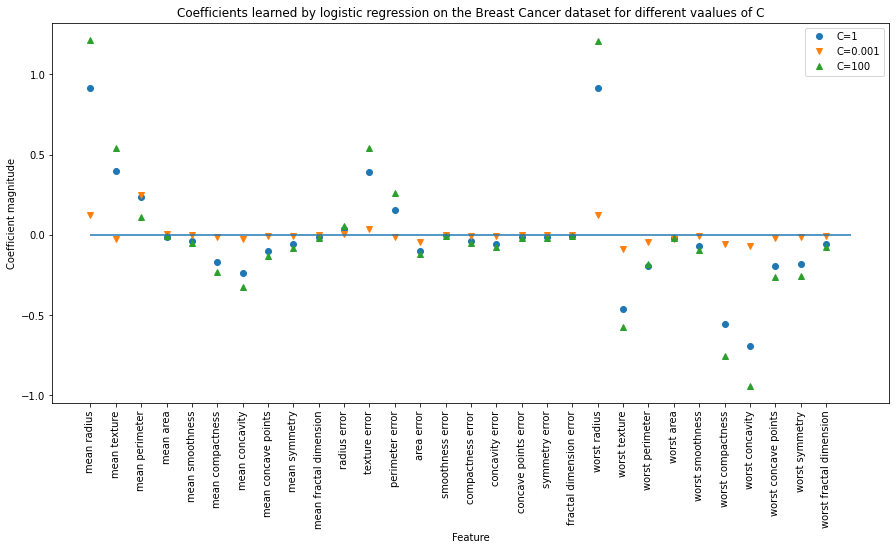

In [45]:
plt.figure(figsize=(15,7))
plt.plot(logreg.coef_.T,'o',label="C=1")
plt.plot(logreg0001.coef_.T,'v',label="C=0.001")
plt.plot(logreg100.coef_.T,'^',label="C=100")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim=[-5,5]
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.title("Coefficients learned by logistic regression on the Breast Cancer dataset for different vaalues of C")
plt.legend()

Traning accuracy of l1 logreg with C=0.001 : 0.91
Test accuracy of l1 logreg with C=0.001 : 0.92
Traning accuracy of l1 logreg with C=1.000 : 0.96
Test accuracy of l1 logreg with C=1.000 : 0.96
Traning accuracy of l1 logreg with C=100.000 : 0.99
Test accuracy of l1 logreg with C=100.000 : 0.98


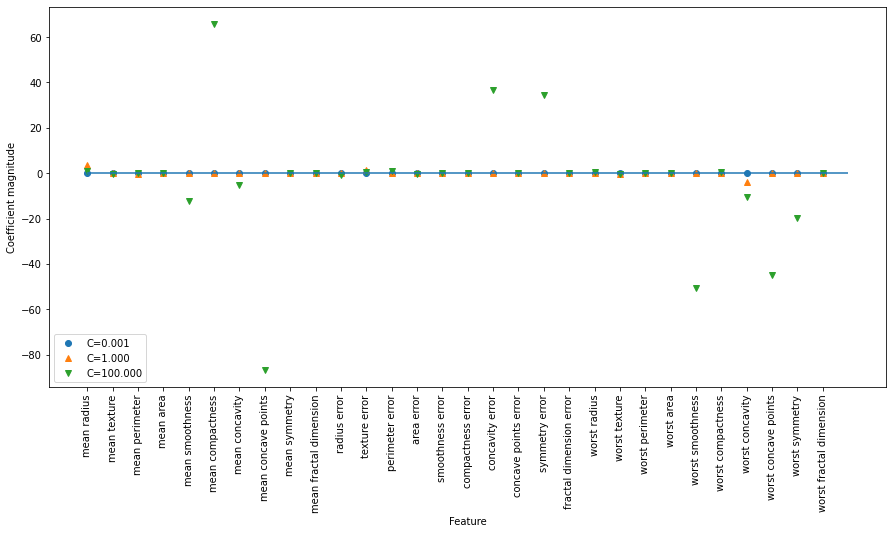

In [52]:
# with L1 regularization
plt.figure(figsize=(15,7))
for C,marker in zip([0.001,1,100],['o','^','v']):
    lr_l1=LogisticRegression(C=C,penalty="l1",solver='liblinear').fit(X_train,y_train)
    
    print("Traning accuracy of l1 logreg with C={:.3f} : {:.2f}".format(C,lr_l1.score(X_train,y_train)))

    print("Test accuracy of l1 logreg with C={:.3f} : {:.2f}".format(C,lr_l1.score(X_test,y_test)))
    
    plt.plot(lr_l1.coef_.T,marker,label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.ylim=[-5,5]
plt.legend(loc=3)

In [49]:
cancer.data.shape[1]

30